<a href="https://www.kaggle.com/code/benfoglia/spaceship-titanic-logistic-regression-w-xgboost?scriptVersionId=139990060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Dataset Description

Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions
* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
 * PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
 * HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
 * CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
 * Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
 * Destination - The planet the passenger will be debarking to.
 * Age - The age of the passenger.
 * VIP - Whether the passenger has paid for special VIP service during the voyage.
 * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
 * Name - The first and last names of the passenger.
 * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
 * PassengerId - Id for each passenger in the test set.
 * Transported - The target. For each passenger, predict either True or False

## Package Imports

In [1]:
#Package imports

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.describe(include = 'object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


## Data Cleaning & Exploration

In [6]:
dfs = [train, test]

In [7]:
# Break up Cabin into deck, number, and side

for df in dfs:
    # split by "/"
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    # Convert "Num" to numeric
    df['Num'] = pd.to_numeric(df['Num'], errors='coerce')  # Convert non-numeric values to NaN
    
# Fill in missing values:

# Numeric columns: use mean
numeric_cols = ['Age', 'Num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for df in dfs:
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
# Categorical columns: use mode, convert to category
categorical_cols = ['HomePlanet', 'Deck', 'Side', 'Destination']

for df in dfs:
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    df[categorical_cols] = df[categorical_cols].astype('category')

train.describe(include = 'category')

,HomePlanet,Destination,Deck,Side
count,8693,8693,8693,8693
unique,3,3,8,2
top,Earth,TRAPPIST-1e,F,S
freq,4803,6097,2993,4487


In [8]:
# Investigate Duplicate names
dupe_names = train[train['Name'].duplicated(keep=False) & ~train['Name'].isna()].sort_values('Name')
dupe_names

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
7270,7775_01,Europa,False,C/253/P,55 Cancri e,28.0,False,7.000000,489.0,0.000000,4.0,6027.000000,Alraium Disivering,False,C,253.000000,P
6296,6665_01,Europa,True,B/222/P,55 Cancri e,17.0,False,0.000000,0.0,0.000000,0.0,0.000000,Alraium Disivering,True,B,222.000000,P
476,0512_02,Europa,True,D/18/S,TRAPPIST-1e,55.0,False,0.000000,0.0,0.000000,0.0,0.000000,Ankalik Nateansive,True,D,18.000000,S
2930,3176_01,Europa,False,E/196/P,TRAPPIST-1e,77.0,False,0.000000,9032.0,0.000000,128.0,1464.000000,Ankalik Nateansive,True,E,196.000000,P
8488,9071_01,Earth,False,F/1855/P,55 Cancri e,22.0,False,0.000000,0.0,1072.000000,46.0,3.000000,Anton Woody,False,F,1855.000000,P
2991,3236_03,Earth,False,E/200/P,TRAPPIST-1e,18.0,False,0.000000,30.0,0.000000,756.0,5.000000,Anton Woody,False,E,200.000000,P
2559,2746_01,Mars,False,F/569/P,TRAPPIST-1e,52.0,False,758.000000,0.0,356.000000,5.0,0.000000,Apix Wala,False,F,569.000000,P
4108,4387_01,Mars,False,F/902/P,PSO J318.5-22,32.0,False,192.000000,0.0,441.000000,18.0,0.000000,Apix Wala,False,F,902.000000,P
7871,8398_01,Europa,True,B/329/S,TRAPPIST-1e,15.0,False,0.000000,0.0,0.000000,0.0,0.000000,Asch Stradick,True,B,329.000000,S
6086,6432_01,Europa,False,D/202/P,55 Cancri e,55.0,False,114.000000,222.0,0.000000,2575.0,2919.000000,Asch Stradick,False,D,202.000000,P


These appear to be coincedental, as these duplicate names don't share other values

In [9]:
# Change T/F columns to binary
tf_columns = ['CryoSleep', 'VIP', 'Transported']

train[tf_columns] = train[tf_columns].fillna(False).astype(int)
test[tf_columns[:2]] = test[tf_columns[:2]].fillna(False).astype(int)

/tmp/ipykernel_20/1297654406.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


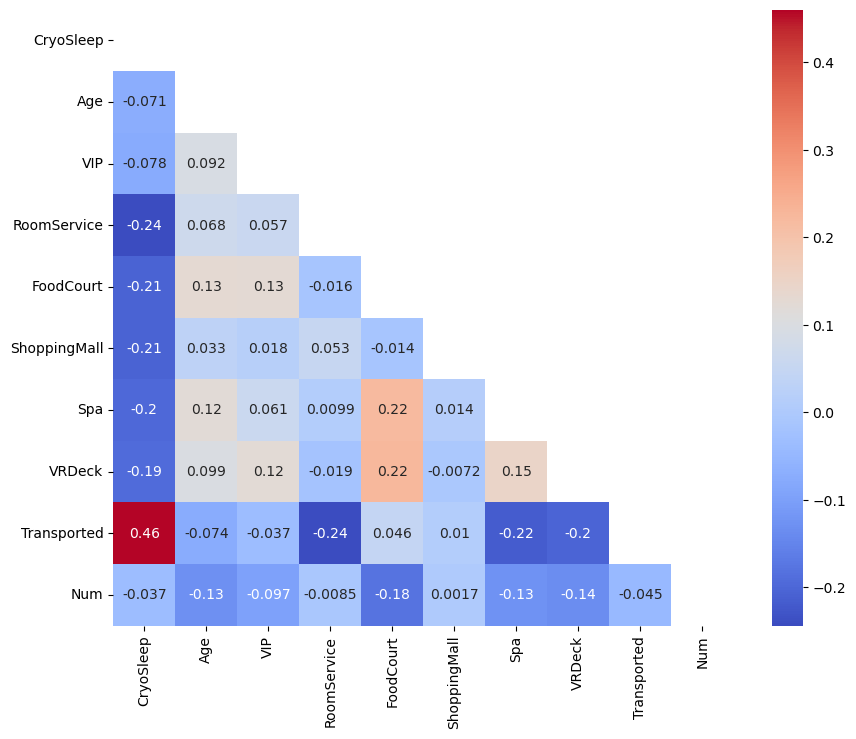

In [10]:
# Correlation Matrix for numeric variables

# Create Matrix without passengerId
corr = train.corr()

# Mask the upper triangular portion
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask = mask)
plt.show()

Cryosleep is the only variable with >25% correlation in either direction

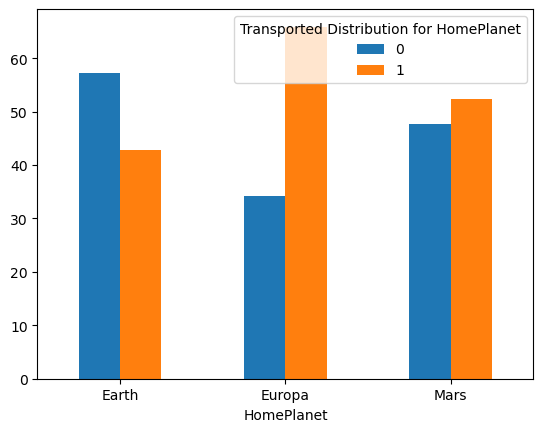

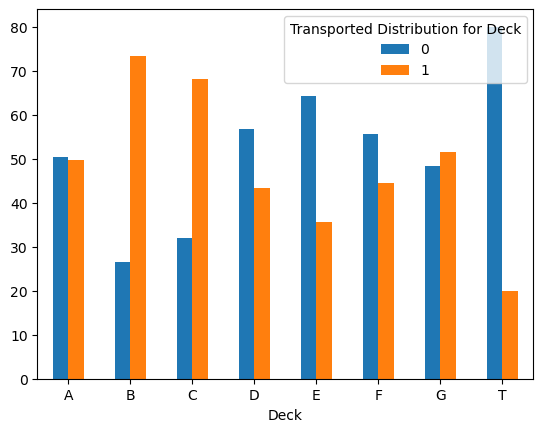

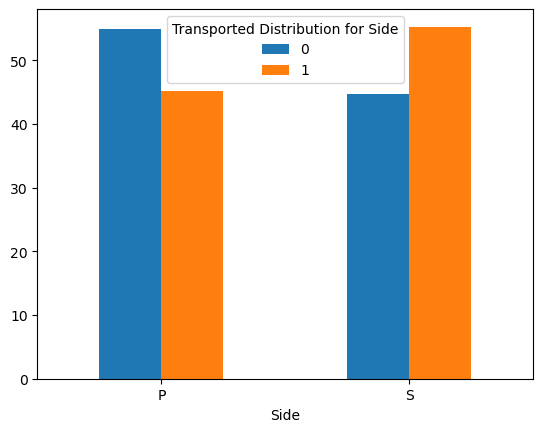

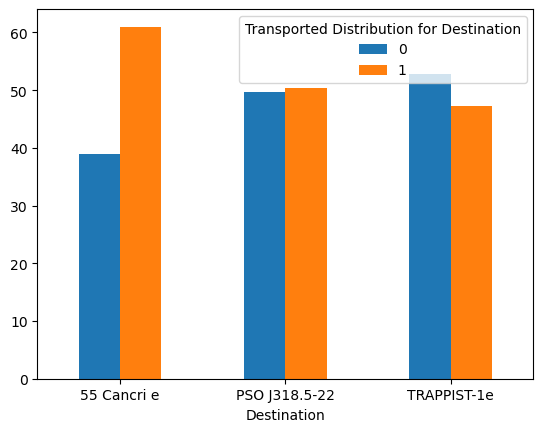

In [11]:
# Crosstabulation with target variable
for col in categorical_cols:
    crosstab = pd.crosstab(train[col], train['Transported'], normalize='index') * 100
    # Create Bar Plots
    pl = crosstab.plot(kind="bar", rot=0)
    pl.legend(title = f'Transported Distribution for {col}')

## Model - XGBoost

Since some of the variables we are dealing with are categorical, the tree_method parameter in the XGBClassifier must be set to hist, approx or gpu_hist. The code below compares the accuracy score of hist and approx.

In [12]:
# Drop unwanted cols
cols_to_drop = ['PassengerId', 'Name', 'Cabin', 'Transported']

# Set features, target variable, random state
X = train.drop(columns = cols_to_drop)
y = train['Transported']

rs = 99

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=rs)

# Initialize and train models with different tree_methods
methods = ['hist', 'approx']
results = []

for method in methods:
    xgb_model = XGBClassifier(n_estimators=100, tree_method=method, random_state=rs, enable_categorical = True)
    xgb_model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = xgb_model.predict(X_val)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_val, y_pred)
    results.append((method, accuracy))

# Compare performance
for method, accuracy in results:
    print(f'{method}: Accuracy = {accuracy}')

hist: Accuracy = 0.8136860264519838
approx: Accuracy = 0.8096607245543416


## Permutation Importance

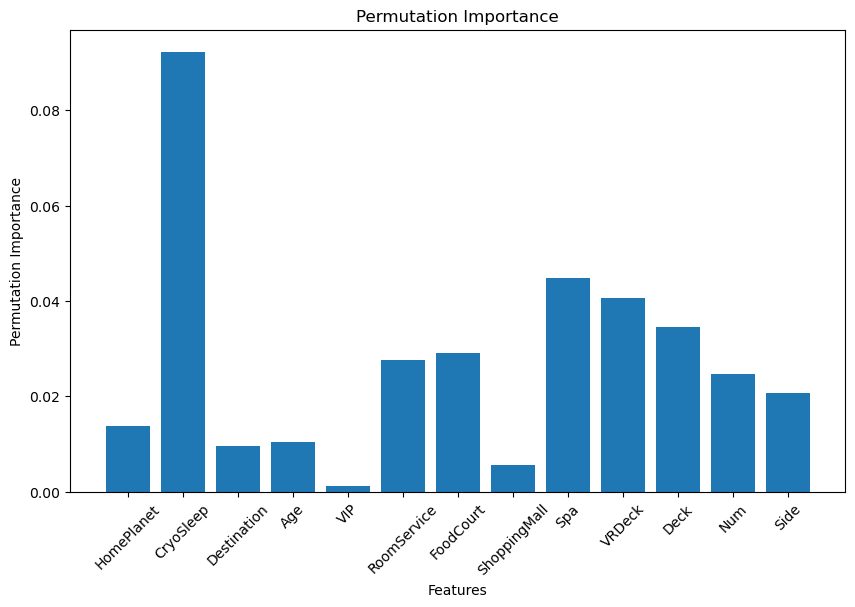

In [13]:
# Use best results (hist) as model
xgb_model = XGBClassifier(n_estimators=100, tree_method='hist', random_state=rs, enable_categorical = True)
xgb_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(xgb_model, X_val, y_val, n_repeats=30, random_state=rs)

# Get feature importance scores
feature_importance = perm_importance.importances_mean

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns.tolist(), feature_importance)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance')
plt.xticks(rotation=45)
plt.show()

It seems odd that a number of the spend-related columns are so important. Let's add a "TotalSpend" column and re-run. VIP has the lowest importance, we'll drop it.

In [14]:
# TotalSpend column
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for df in dfs:
    df['TotalSpend'] = df[spend_cols].sum(axis=1)
    
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,TotalSpend
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0.0,S,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1.0,S,1091.0


## Model Re-Evaluation

In [15]:
# Re-run both tree methods, calculate accuracy score

cols_to_drop.append('VIP')

# Set features, target variable, random state
X = train.drop(columns = cols_to_drop)
y = train['Transported']

rs = 99

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=rs)

# Initialize and train models with different tree_methods
methods = ['hist', 'approx']
results = []

for method in methods:
    xgb_model = XGBClassifier(n_estimators=100, tree_method=method, random_state=rs, enable_categorical = True)
    xgb_model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = xgb_model.predict(X_val)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_val, y_pred)
    results.append((method, accuracy))

# Compare performance
for method, accuracy in results:
    print(f'{method}: Accuracy = {accuracy}')

hist: Accuracy = 0.8125359401955147
approx: Accuracy = 0.8131109833237493


## Predictions & Submission of Test Data

In [16]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side,TotalSpend
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,0.0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,2832.0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,0.0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,7418.0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,645.0


In [17]:
# Use Approx model
xgb_model = XGBClassifier(n_estimators=100, tree_method='approx', random_state=rs, enable_categorical = True)
xgb_model.fit(X_train, y_train)

# Check cols to drop
cols_to_drop_test = [col for col in cols_to_drop if col in test.columns]

# Make Predictions
test_preds = xgb_model.predict(test.drop(columns = cols_to_drop_test, axis=1))

In [18]:
# Prepare submission file
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': test_preds})
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,1
4274,9271_01,1
4275,9273_01,1
